<a href="https://colab.research.google.com/github/vimalthomas-db/deeplearning/blob/main/train_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##############################################################################
#
# This python notebook downloads MNIST data from kaggle and performs
# standardization, training, validation and testing data splits before using the
# manual MLP model to train to predict MNST digit images.
#
#     02/25/2025
#     Vimal Thomas Joseph
#
# Initial Draft
#
#############################################################################

import kagglehub
import os
import numpy as np

# Download the dataset
path = kagglehub.dataset_download("hojjatk/mnist-dataset", force_download=True)

# Define data loading functions and normalize the pixel values to 0 and 1.

def load_mnist_images(filename):
    with open(filename, "rb") as f:
        f.read(16)
        data = np.fromfile(f, dtype=np.uint8)
    return data.reshape(-1, 28 * 28) / 255.0

def load_mnist_labels(filename):
    with open(filename, "rb") as f:
        f.read(8)
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Initialize data variables
train_x, train_y, test_x, test_y = None, None, None, None

# List items in the downloaded directory and load data if the item is of type file.

for item in os.listdir(path):
    item_path = os.path.join(path, item)

    if os.path.isfile(item_path):
        print(f"Found file: {item}")
        if "train-images" in item and item.endswith(".idx3-ubyte"):
            train_x = load_mnist_images(item_path)
        elif "train-labels" in item and item.endswith(".idx1-ubyte"):
            train_y = load_mnist_labels(item_path)
        elif "t10k-images" in item and item.endswith(".idx3-ubyte"):
            test_x = load_mnist_images(item_path)
        elif "t10k-labels" in item and item.endswith(".idx1-ubyte"):
            test_y = load_mnist_labels(item_path)


if train_x is not None and train_y is not None and test_x is not None and test_y is not None:
    print(f"Train Images Shape: {train_x.shape}, Train Labels Shape: {train_y.shape}")
    print(f"Test Images Shape: {test_x.shape}, Test Labels Shape: {test_y.shape}")
else:
    print("Error: Could not load all necessary data files.")

100%|██████████| 22.0M/22.0M [00:00<00:00, 30.3MB/s]

Extracting files...


Found file: t10k-labels.idx1-ubyte
Found file: train-labels.idx1-ubyte
Found file: train-images.idx3-ubyte
Found file: t10k-images.idx3-ubyte
Train Images Shape: (60000, 784), Train Labels Shape: (60000,)
Test Images Shape: (10000, 784), Test Labels Shape: (10000,)


In [ ]:
#Divide the dataset furthen into training and validation in the 8:2 ratio.


# Calculate the split index
split_index = int(0.8 * len(train_x))

# Split the training data into training and validation sets
train_x_new, val_x = train_x[:split_index], train_x[split_index:]
train_y_new, val_y = train_y[:split_index], train_y[split_index:]

# Print the shapes of the new datasets
print(f"New Train Images Shape: {train_x_new.shape}, New Train Labels Shape: {train_y_new.shape}")
print(f"Validation Images Shape: {val_x.shape}, Validation Labels Shape: {val_y.shape}")


New Train Images Shape: (48000, 784), New Train Labels Shape: (48000,)
Validation Images Shape: (12000, 784), Validation Labels Shape: (12000,)


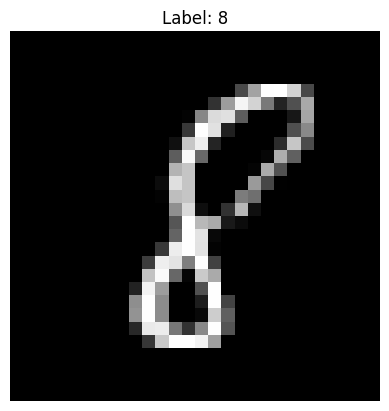

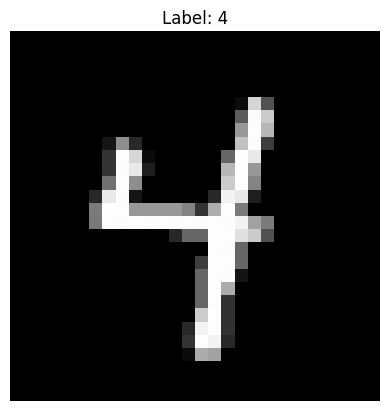

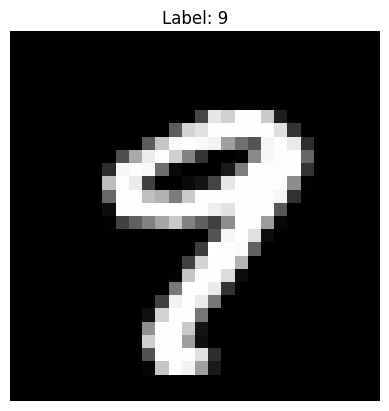

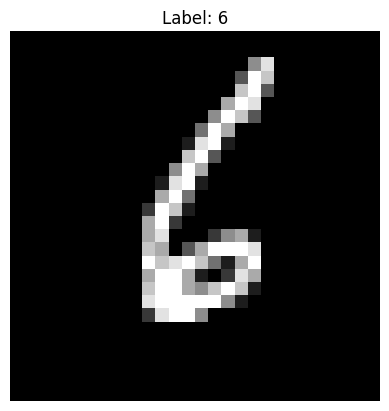

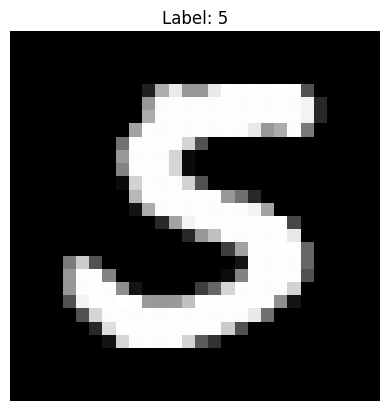

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize mnist image

def show_image(image_vector, label):
    image = image_vector.reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

# Show 5 random images
num_samples = 5
indices = np.random.choice(len(train_x_new), num_samples, replace=False)

for i in indices:
    show_image(train_x_new[i], train_y[i])


In [ ]:

#function to one hot encode the clases so that the values are either 0 or 1

def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

# Convert labels
train_y_one_hot = one_hot_encode(train_y_new)
val_y_one_hot = one_hot_encode(val_y)

# Print  example
print(f"Example Label: {train_y_new[0]}, One-Hot: {train_y_one_hot[0]}")


Example Label: 5, One-Hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#step to run the model from github. The multilayer perceptron is loaded from the github

!git clone https://github.com/vimalthomas-db/deeplearning.git
%cd deeplearning/

# Run the model notebook
%run "deploy_multilayerperceptron.ipynb"

Cloning into 'deeplearning'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 183 (delta 25), reused 2 (delta 2), pack-reused 134 (from 1)
Receiving objects: 100% (183/183), 1.34 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (108/108), done.
/content/deeplearning/deeplearning


In [ ]:
# Check the shapes of training and test data
print(f"Train X shape: {train_x_new.shape}, Train Y shape: {train_y_one_hot.shape}")
print(f"Val X shape: {val_x.shape}, Test Y shape: {val_y_one_hot.shape}")


Train X shape: (48000, 784), Train Y shape: (48000, 10)
Val X shape: (12000, 784), Test Y shape: (12000, 10)


In [ ]:
#initialize the variables for better readability

training_losses,validation_losses=[],[]

In [ ]:
print(training_losses)

[]


In [ ]:
# Define the MLP architecture

#The MLP architecture contains Relu hidden layers and Softmax based output layer.

mlp = MultilayerPerceptron([
    Layer(784, 128, Relu(),dropout_rate=0.4),
    Layer(128, 64, Relu(),dropout_rate=0.4),
    Layer(64, 10, Softmax())
])

# Define the loss function
loss_function = CrossEntropy()

# Train the model
training_losses, validation_losses = mlp.train(
    train_x_new, train_y_one_hot,  # Train Data
    val_x, val_y_one_hot,    # Validation Data
    loss_function,
    learning_rate=0.0001,
    batch_size=32,
    epochs=30, # Adjust epochs as needed
    model_type='classification',
    RMSProp=True

)



Epoch 1/30 - Training Loss: 1.2169 - Training Acc: 77.76% - Validation Acc: 79.59% - Validation Loss: 0.4351
Epoch 2/30 - Training Loss: 0.5942 - Training Acc: 85.04% - Validation Acc: 85.71% - Validation Loss: 0.2967
Epoch 3/30 - Training Loss: 0.4576 - Training Acc: 88.10% - Validation Acc: 88.44% - Validation Loss: 0.2539
Epoch 4/30 - Training Loss: 0.3891 - Training Acc: 89.59% - Validation Acc: 89.88% - Validation Loss: 0.2284
Epoch 5/30 - Training Loss: 0.3528 - Training Acc: 90.56% - Validation Acc: 90.97% - Validation Loss: 0.2108
Epoch 6/30 - Training Loss: 0.3263 - Training Acc: 91.26% - Validation Acc: 91.66% - Validation Loss: 0.1966
Epoch 7/30 - Training Loss: 0.3018 - Training Acc: 92.00% - Validation Acc: 92.14% - Validation Loss: 0.1872
Epoch 8/30 - Training Loss: 0.2829 - Training Acc: 92.28% - Validation Acc: 92.47% - Validation Loss: 0.1783
Epoch 9/30 - Training Loss: 0.2715 - Training Acc: 92.74% - Validation Acc: 92.64% - Validation Loss: 0.1724
Epoch 10/30 - Train

In [ ]:
print(training_losses)

[1.216858232281614, 0.5941572726987473, 0.4576126747923454, 0.38909423183100783, 0.3528444275964573, 0.32633331207804817, 0.30180654915843447, 0.2828521999132471, 0.2714718173340395, 0.25990586432695767, 0.24730492084433578, 0.24070592951746922, 0.23151633172762112, 0.22754619880326143, 0.22303324045753814, 0.21643201136943965, 0.21241409952937332, 0.20875697902942844, 0.20090206821110018, 0.19861227915648016, 0.19860058410450823, 0.19760423970065738, 0.1898987686271602, 0.18714277266153814, 0.18840148773396861, 0.18026874835911103, 0.18328789118921004, 0.18288900830664367, 0.18249871827199, 0.17929090351593824]


In [ ]:
# Compute test accuracy
val_accuracy = compute_accuracy(mlp, val_x, val_y_one_hot)
print(f"Test Accuracy: {val_accuracy:.2f}%")


Test Accuracy: 95.14%


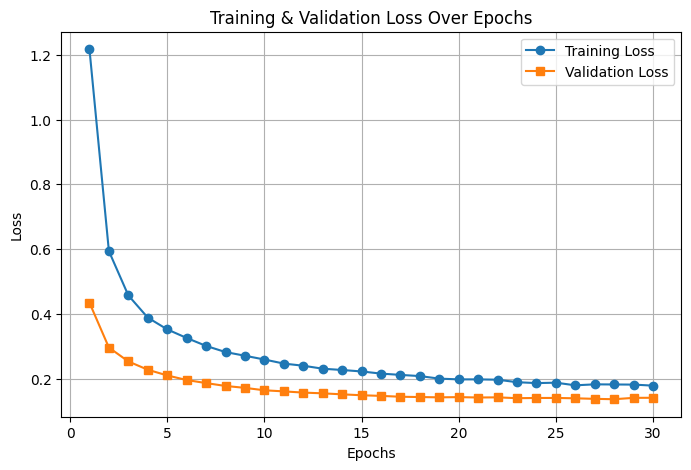

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation losses
def plot_losses(training_losses, validation_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(training_losses) + 1), training_losses, label="Training Loss", marker="o")
    plt.plot(range(1, len(validation_losses) + 1), validation_losses, label="Validation Loss", marker="s")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the loss curves
plot_losses(training_losses, validation_losses)


In [ ]:
print(training_losses)

[1.216858232281614, 0.5941572726987473, 0.4576126747923454, 0.38909423183100783, 0.3528444275964573, 0.32633331207804817, 0.30180654915843447, 0.2828521999132471, 0.2714718173340395, 0.25990586432695767, 0.24730492084433578, 0.24070592951746922, 0.23151633172762112, 0.22754619880326143, 0.22303324045753814, 0.21643201136943965, 0.21241409952937332, 0.20875697902942844, 0.20090206821110018, 0.19861227915648016, 0.19860058410450823, 0.19760423970065738, 0.1898987686271602, 0.18714277266153814, 0.18840148773396861, 0.18026874835911103, 0.18328789118921004, 0.18288900830664367, 0.18249871827199, 0.17929090351593824]


In [ ]:
#validate the test data based on the trained model.

import numpy as np

# Get predictions on test data
test_y_one_hot = one_hot_encode(test_y)

test_predictions = mlp.forward(test_x,training=False)
test_pred_classes = np.argmax(test_predictions, axis=1)
test_true_classes = np.argmax(test_y_one_hot, axis=1)

# Compute per-class accuracy
unique_classes = np.unique(test_true_classes)
for cls in unique_classes:
    cls_mask = test_true_classes == cls
    cls_accuracy = np.mean(test_pred_classes[cls_mask] == test_true_classes[cls_mask]) * 100
    print(f"Accuracy for digit {cls}: {cls_accuracy:.2f}%")


# Calculate overall accuracy
overall_accuracy = np.mean(test_pred_classes == test_true_classes) * 100
print(f"Overall Test Accuracy: {overall_accuracy:.2f}%")


Accuracy for digit 0: 98.88%
Accuracy for digit 1: 98.94%
Accuracy for digit 2: 96.22%
Accuracy for digit 3: 96.83%
Accuracy for digit 4: 96.95%
Accuracy for digit 5: 95.40%
Accuracy for digit 6: 97.29%
Accuracy for digit 7: 96.60%
Accuracy for digit 8: 95.28%
Accuracy for digit 9: 95.04%
Overall Test Accuracy: 96.78%


In [ ]:
print(f"Overall Test Accuracy: {overall_accuracy:.2f}%")

Overall Test Accuracy: 96.78%


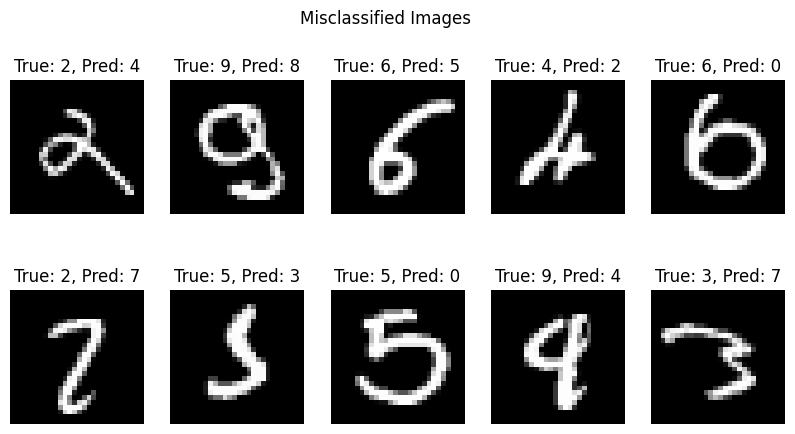

In [ ]:
import matplotlib.pyplot as plt


# Find misclassified indices
misclassified = np.where(test_pred_classes != test_true_classes)[0]

# Plot a few misclassified samples
num_samples = 10  # Number of misclassified images to show
plt.figure(figsize=(10, 5))

for i, idx in enumerate(misclassified[:num_samples]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")
    plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Images")
plt.show()


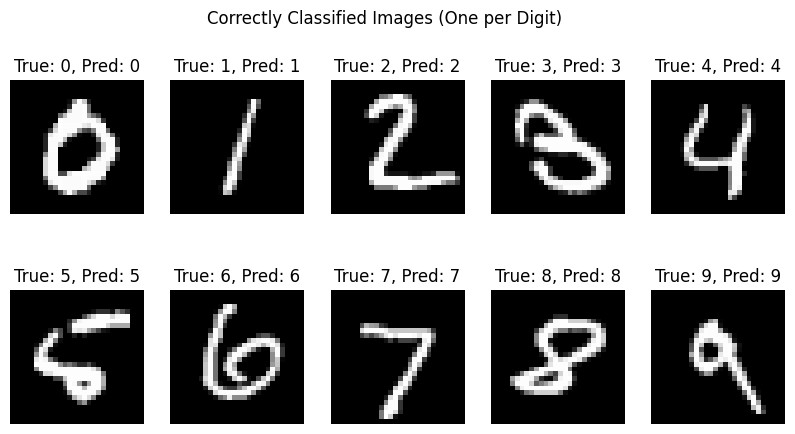

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Find correctly classified indices for each digit
classified_indices = {}
for digit in range(10):
    classified_indices[digit] = np.where((test_pred_classes == digit) & (test_true_classes == digit))[0]

# Plot one sample for each digit
plt.figure(figsize=(10, 5))
for digit in range(10):
    if len(classified_indices[digit]) > 0:
        idx = classified_indices[digit][0]
        plt.subplot(2, 5, digit + 1)
        plt.imshow(test_x[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True: {test_true_classes[idx]}, Pred: {test_pred_classes[idx]}")
        plt.axis("off")
    else:
        print(f"No correctly classified samples found for digit {digit}")

plt.suptitle("Correctly Classified Images (One per Digit)")
plt.show()

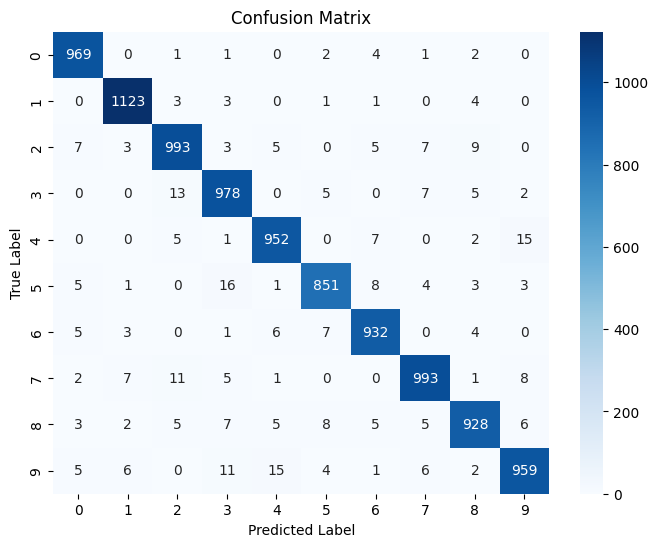

In [ ]:
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(test_true_classes, test_pred_classes)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
